<a href="https://colab.research.google.com/github/jaymonty/Predicting-Adolescent-Delinquency-Violence-Using-Data-Mining-Techniques/blob/main/Group1_Data240_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
import scikitplot as skplt

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '19IWNzmJ0k41UVUc320EnvwEDKi77YiyC'
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('file.csv')
df = pd.read_csv('file.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.shape

(68507, 146)

In [ ]:
df.head()

,Unnamed: 0,CASEID,SCOUNTRY,MALE,AGEGROUP,BIRTHP,BIRTHPM,BIRTHPF,FAMILY,LANGH1,DISCRIM,WORKFATH,WORKMOTH,OWNROOM,COMPUSE,OWNMOBPH,FAMILCAR,VICROBBP,VICASSAP,VICTHEFP,VICBULLP,GETALFA,GETALMO,LEISFAM,DINNFAM,KNOWFR,TELLTIME,OBEYTIME,LIFEEV01,LIFEEV02,LIFEEV03,LIFEEV04,LIFEEV05,LIFEEV06,LIFEEV07,LIFEEV08,NIGHTACT,ACTIV01,ACTIV02,ACTIV03,ACTIV04,ACTIV05,ACTIV06,ACTIV07,TRANSP01,TRANSP02,TRANSP03,TRANSP04,TRANSP05,TRANSP06,TRANSP07,LEISSP01,LEISSP02,LEISSP03,LEISSP04,GROUPFR,GRPAGE01,GRPAGE02,GRPAGE03,GRPAGE04,GRPAGE05,GRPPUBL,GRPEXIST,GRPILLAC,GRPILLDO,GRPGANG,GRPGEND,GRPETHN,ETHNFRND,FRNDAC01,FRNDAC02,FRNDAC03,FRNDAC04,FRNDAC05,FRNDAC06,FRNDAC07,FRNDAC08,FRNDAC09,ATTVIO01,ATTVIO02,ATTVIO03,ATTVIO04,ATTVIO05,SELFC01,SELFC02,SELFC03,SELFC04,SELFC05,SELFC06,SELFC07,SELFC08,SELFC09,SELFC10,SELFC11,SELFC12,ACCIDP,ATTSCH,REPGRADE,TRUANCY,ACHIEV,ATSCH01,ATSCH02,ATSCH03,ATSCH04,ATSCH05,ATSCH06,ATSCH07,ATSCH08,AFTSCH,NHOOD01,NHOOD02,NHOOD03,NHOOD04,NHOOD05,NHOOD06,NHOOD07,NHOOD08,NHOOD09,NHOOD10,NHOOD11,NHOOD12,NHOOD13,DELPDR,DELPSL,DELPBU,DELPEX,DELPAS,BEERLTP,SPIRLTP,HASHLTP,XTCLTP,LHCLTP,VANDLTP,SHOPLTP,BURGLTP,BICTLTP,CARTLTP,DOWNLTP,HACKLTP,CARBLTP,SNATLTP,WEAPLTP,EXTOLTP,GFIGLTP,ASLTLTP,DRUDLTP
0,0,101001,USA,1,1,1,1,1,5,1,1,1,7,1,0,1,1,0,0,1,0,4,4,5,5,2,1,2,0,0,1,0,1,1,0,1,8,2,1,5,1,6,6,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,3,1,1,7,3,2,6,1,1,2,2,2,3,2,9,9,3,1,4,4,4,3,3,3,4,4,3,2,2,2,2,2,2,7,1,1,2,2,2,3,1,4,3,3,3,3,4,3,2,4,3,3,3,3,2,3,3,3,4,2,1,1,1,1,1,1,1,1,0,0,1,1,1,1,9,9,9,9,9,9,9,9,9,9
1,1,101002,USA,0,1,1,1,1,1,1,1,1,3,1,1,1,1,0,0,0,0,2,4,1,8,3,1,3,0,0,0,0,1,1,1,0,1,6,1,2,1,1,5,9,0,0,1,0,0,0,0,0,0,0,1,0,8,8,8,8,8,8,8,8,8,8,8,2,1,1,1,1,1,1,4,2,1,9,3,1,1,2,4,3,1,1,2,9,2,1,1,2,2,1,4,1,3,1,1,3,4,7,3,1,1,1,4,2,5,2,1,2,1,1,1,1,1,1,3,3,4,1,0,0,0,0,0,0,0,0,0,0,0,1,9,9,9,9,9,9,9,9,9,9,9,9
2,2,101003,USA,1,1,1,2,1,1,1,1,2,1,1,1,1,1,0,0,0,0,3,4,4,3,2,1,2,0,0,1,0,0,0,0,0,8,6,1,5,1,6,5,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,3,0,0,0,3,1,1,1,1,1,1,1,3,3,1,9,3,2,4,2,3,3,2,2,4,4,4,3,1,3,1,4,1,3,1,1,1,2,1,3,1,2,3,3,1,4,99,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3,3,101004,USA,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,3,4,6,4,2,1,2,0,0,1,0,0,0,0,0,8,4,1,5,1,4,3,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,3,0,0,0,3,1,1,2,1,1,1,1,2,2,1,9,3,2,4,2,3,3,2,2,4,4,4,2,1,3,1,4,1,3,3,1,1,2,2,1,3,4,3,3,3,3,99,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,4,101005,USA,1,1,1,1,1,6,1,1,3,6,1,1,0,1,0,0,0,0,4,4,6,8,3,1,3,0,0,0,0,0,0,0,0,3,3,2,2,1,1,4,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,3,0,0,0,1,1,1,1,1,1,1,1,4,2,1,7,2,1,4,1,1,1,1,3,3,2,3,1,1,1,3,1,1,1,3,1,1,3,4,2,3,3,1,1,1,1,5,3,1,1,1,1,1,1,1,1,3,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

# Don't need "Unnamed: 0", and 'CASEID'
df.drop(columns=['Unnamed: 0','CASEID'], inplace=True)

In [ ]:
df.shape

(68507, 144)

# Data Pre-Processing

In [ ]:
# 143 ints, 1 object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68507 entries, 0 to 68506
Columns: 144 entries, SCOUNTRY to DRUDLTP
dtypes: int64(143), object(1)
memory usage: 75.3+ MB


In [ ]:
# Null values
df.isnull().sum().sum()

0

In [ ]:
# Missing values
df.isna().sum().sum()

0

In [ ]:
cat_col_names = []
num_col_names = []

for col in df.columns:
  if df[col].dtype == 'object':
    cat_col_names.append(col)
  else:
    num_col_names.append(col)

print(cat_col_names)
print()
print(num_col_names)

['SCOUNTRY']

['MALE', 'AGEGROUP', 'BIRTHP', 'BIRTHPM', 'BIRTHPF', 'FAMILY', 'LANGH1', 'DISCRIM', 'WORKFATH', 'WORKMOTH', 'OWNROOM', 'COMPUSE', 'OWNMOBPH', 'FAMILCAR', 'VICROBBP', 'VICASSAP', 'VICTHEFP', 'VICBULLP', 'GETALFA', 'GETALMO', 'LEISFAM', 'DINNFAM', 'KNOWFR', 'TELLTIME', 'OBEYTIME', 'LIFEEV01', 'LIFEEV02', 'LIFEEV03', 'LIFEEV04', 'LIFEEV05', 'LIFEEV06', 'LIFEEV07', 'LIFEEV08', 'NIGHTACT', 'ACTIV01', 'ACTIV02', 'ACTIV03', 'ACTIV04', 'ACTIV05', 'ACTIV06', 'ACTIV07', 'TRANSP01', 'TRANSP02', 'TRANSP03', 'TRANSP04', 'TRANSP05', 'TRANSP06', 'TRANSP07', 'LEISSP01', 'LEISSP02', 'LEISSP03', 'LEISSP04', 'GROUPFR', 'GRPAGE01', 'GRPAGE02', 'GRPAGE03', 'GRPAGE04', 'GRPAGE05', 'GRPPUBL', 'GRPEXIST', 'GRPILLAC', 'GRPILLDO', 'GRPGANG', 'GRPGEND', 'GRPETHN', 'ETHNFRND', 'FRNDAC01', 'FRNDAC02', 'FRNDAC03', 'FRNDAC04', 'FRNDAC05', 'FRNDAC06', 'FRNDAC07', 'FRNDAC08', 'FRNDAC09', 'ATTVIO01', 'ATTVIO02', 'ATTVIO03', 'ATTVIO04', 'ATTVIO05', 'SELFC01', 'SELFC02', 'SELFC03', 'SELFC04', 'SELFC05', 'SE

In [ ]:
# Looking at the values for each feature

for col in num_col_names:
  print(col, '({})'.format(df[col].nunique()), ":")
  print(df[col].value_counts())
  print()
  print()

MALE (4) :
0    34583
1    33758
9      154
7       12
Name: MALE, dtype: int64


AGEGROUP (5) :
1    62672
2     5391
9      236
3      153
0       55
Name: AGEGROUP, dtype: int64


BIRTHP (4) :
1    62781
0     5354
9      355
7       17
Name: BIRTHP, dtype: int64


BIRTHPM (6) :
1    55581
2    11274
3      627
4      517
9      491
7       17
Name: BIRTHPM, dtype: int64


BIRTHPF (6) :
1    54802
2    11262
4     1163
3      684
9      573
7       23
Name: BIRTHPF, dtype: int64


FAMILY (11) :
1     49515
3      7988
5      4171
2      3338
7      1169
4       887
6       566
9       348
8       196
99      196
97      133
Name: FAMILY, dtype: int64


LANGH1 (4) :
1    57890
0     6157
9     4407
7       53
Name: LANGH1, dtype: int64


DISCRIM (6) :
1    59720
3     4122
2     3367
4      880
9      398
7       20
Name: DISCRIM, dtype: int64


WORKFATH (10) :
1     46529
2     10521
98     4020
3      2172
6      1217
4      1165
7       933
99      876
5       753
97      321
Name

In [ ]:
# Cleaning the dataset
# Note: some columns should retain 7,8,9. For example 'FAMILY'
# Use METADATA to check what to drop.
# ===== Dropping =======

# 7: ambiguous answer
# 9: no answer
# 97: ambiguous answer
# 98: not around
# 99: no answer

In [ ]:
# 'good' means the feature has been checked and is ready for training

df = df[df['MALE'] <= 1]      # good
df = df[df['AGEGROUP'] <= 3]  # good
df = df[df['BIRTHP'] <= 1]    # good
df = df[df['BIRTHPM'] <= 4]   # good
df = df[df['BIRTHPF'] <= 4]   # good
df = df[df['FAMILY'] <= 9]    # good
df = df[df['LANGH1'] <= 1]    # good
df = df[df['DISCRIM'] <= 4]   # good

df = df[df['OWNROOM'] <= 1]   # good
df = df[df['COMPUSE'] <= 1]   # good
df = df[df['OWNMOBPH'] <= 1]  # good
df = df[df['FAMILCAR'] <= 1]  # good
df = df[df['VICROBBP'] <= 1]  # good
df = df[df['VICASSAP'] <= 1]  # good
df = df[df['VICTHEFP'] <= 1]  # good
df = df[df['VICBULLP'] <= 1]  # good

In [ ]:
df = df[df['GETALFA'] <= 4]  # good
df = df[df['GETALMO'] <= 4]  # good

In [ ]:
df = df[df['LEISFAM'] <= 6]   # good
df = df[df['DINNFAM'] <= 8]   # good

In [ ]:
df = df[df['KNOWFR'] <= 3]   # good

In [ ]:
df = df[df['TELLTIME'] <= 8]   # good
df = df[df['OBEYTIME'] <= 8]   # good

In [ ]:
df = df[df['LIFEEV01'] <= 1]    # good
df = df[df['LIFEEV02'] <= 1]    # good
df = df[df['LIFEEV05'] <= 1]    # good
df = df[df['LIFEEV06'] <= 1]    # good
df = df[df['LIFEEV07'] <= 1]    # good
df = df[df['LIFEEV08'] <= 1]    # good
df = df[df['NIGHTACT'] <= 8]    # good

df = df[df['ACTIV01'] <= 6]     # good
df = df[df['ACTIV02'] <= 6]     # good
df = df[df['ACTIV03'] <= 6]     # good
df = df[df['ACTIV04'] <= 6]     # good
df = df[df['ACTIV05'] <= 6]     # good
df = df[df['ACTIV06'] <= 6]     # good
df = df[df['ACTIV07'] <= 6]     # good

In [ ]:
df = df[df['TRANSP01'] <= 1]    # good
df = df[df['TRANSP02'] <= 8]    # good
df = df[df['TRANSP03'] <= 8]    # good
df = df[df['TRANSP04'] <= 8]    # good
df = df[df['TRANSP05'] <= 8]    # good
df = df[df['TRANSP06'] <= 8]    # good
df = df[df['TRANSP07'] <= 8]    # good

df = df[df['LEISSP01'] <= 1]    # good
df = df[df['LEISSP02'] <= 1]    # good
df = df[df['LEISSP03'] <= 1]    # good
df = df[df['LEISSP04'] <= 1]    # good

In [ ]:
df = df[df['GROUPFR'] <= 1]     # good
df = df[df['GRPPUBL'] <= 8]     # good

In [ ]:
# Need to encode 'SCOUNTRY'
# It's the ONLY non-numerical column
df['SCOUNTRY'].value_counts()

Italy          3878
Switzerland    2715
Germany        2424
Czech Rep.     2365
Austria        2072
Portugal       2013
Armenia        1856
France         1832
Russia         1764
USA            1699
Slovenia       1643
Cyprus         1574
Hungary        1522
Estonia        1461
Lithuania      1443
Netherlands    1433
Sweden         1404
Belgium        1351
Spain          1239
Bosnia/H.      1160
Norway         1134
Ireland        1068
Poland         1023
Finland         912
Denmark         817
Iceland         411
Aruba           402
Venezuela       317
Name: SCOUNTRY, dtype: int64

In [ ]:
# Encode country since it's non-numeric
le = LabelEncoder()

# fit and transform the string column
df['SCOUNTRY'] = le.fit_transform(df['SCOUNTRY'])

In [ ]:
df['SCOUNTRY'].value_counts()

15    3878
25    2715
11    2424
6     2365
2     2072
20    2013
0     1856
10    1832
21    1764
26    1699
22    1643
5     1574
12    1522
8     1461
16    1443
17    1433
24    1404
3     1351
23    1239
4     1160
18    1134
14    1068
19    1023
9      912
7      817
13     411
1      402
27     317
Name: SCOUNTRY, dtype: int64

### Delinquent Acts That Make Up Violence
**vandltp**	Damage something on purpose

**extoltp**	Threaten someone w/ weapon

**gfigltp**	Partake in group fight

**asltltp**	Intentionally beat up someone



### Feature Engineering

In [ ]:
# create new column 'Violence' w/ correlated deliquent acts
df['Violence'] = (df['VANDLTP'] == 1) | (df['EXTOLTP'] == 1) | (df['GFIGLTP'] == 1 | (df['ASLTLTP'] == 1))

In [ ]:
# drop deliquent columns that are NOT related to violence
df.drop(columns=['SHOPLTP','BURGLTP','BICTLTP','CARTLTP','CARBLTP','SNATLTP','DRUDLTP','BEERLTP','SPIRLTP','HASHLTP','XTCLTP','LHCLTP','DOWNLTP','HACKLTP','WEAPLTP'], inplace=True)

In [ ]:
df.shape

(42932, 130)

In [ ]:
# Target is now binary with an imbalance that is managable
df['Violence'].value_counts()

False    32336
True     10596
Name: Violence, dtype: int64

In [ ]:
# Drop columns that made up 'Violence' column
df.drop(columns=['VANDLTP','EXTOLTP','GFIGLTP','ASLTLTP'], inplace=True)
#df = df.reset_index(drop=True)

In [ ]:
df.head()

,SCOUNTRY,MALE,AGEGROUP,BIRTHP,BIRTHPM,BIRTHPF,FAMILY,LANGH1,DISCRIM,WORKFATH,WORKMOTH,OWNROOM,COMPUSE,OWNMOBPH,FAMILCAR,VICROBBP,VICASSAP,VICTHEFP,VICBULLP,GETALFA,GETALMO,LEISFAM,DINNFAM,KNOWFR,TELLTIME,OBEYTIME,LIFEEV01,LIFEEV02,LIFEEV03,LIFEEV04,LIFEEV05,LIFEEV06,LIFEEV07,LIFEEV08,NIGHTACT,ACTIV01,ACTIV02,ACTIV03,ACTIV04,ACTIV05,ACTIV06,ACTIV07,TRANSP01,TRANSP02,TRANSP03,TRANSP04,TRANSP05,TRANSP06,TRANSP07,LEISSP01,LEISSP02,LEISSP03,LEISSP04,GROUPFR,GRPAGE01,GRPAGE02,GRPAGE03,GRPAGE04,GRPAGE05,GRPPUBL,GRPEXIST,GRPILLAC,GRPILLDO,GRPGANG,GRPGEND,GRPETHN,ETHNFRND,FRNDAC01,FRNDAC02,FRNDAC03,FRNDAC04,FRNDAC05,FRNDAC06,FRNDAC07,FRNDAC08,FRNDAC09,ATTVIO01,ATTVIO02,ATTVIO03,ATTVIO04,ATTVIO05,SELFC01,SELFC02,SELFC03,SELFC04,SELFC05,SELFC06,SELFC07,SELFC08,SELFC09,SELFC10,SELFC11,SELFC12,ACCIDP,ATTSCH,REPGRADE,TRUANCY,ACHIEV,ATSCH01,ATSCH02,ATSCH03,ATSCH04,ATSCH05,ATSCH06,ATSCH07,ATSCH08,AFTSCH,NHOOD01,NHOOD02,NHOOD03,NHOOD04,NHOOD05,NHOOD06,NHOOD07,NHOOD08,NHOOD09,NHOOD10,NHOOD11,NHOOD12,NHOOD13,DELPDR,DELPSL,DELPBU,DELPEX,DELPAS,Violence
0,26,1,1,1,1,1,5,1,1,1,7,1,0,1,1,0,0,1,0,4,4,5,5,2,1,2,0,0,1,0,1,1,0,1,8,2,1,5,1,6,6,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,3,1,1,7,3,2,6,1,1,2,2,2,3,2,9,9,3,1,4,4,4,3,3,3,4,4,3,2,2,2,2,2,2,7,1,1,2,2,2,3,1,4,3,3,3,3,4,3,2,4,3,3,3,3,2,3,3,3,4,2,1,1,1,1,1,True
2,26,1,1,1,2,1,1,1,1,2,1,1,1,1,1,0,0,0,0,3,4,4,3,2,1,2,0,0,1,0,0,0,0,0,8,6,1,5,1,6,5,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,3,0,0,0,3,1,1,1,1,1,1,1,3,3,1,9,3,2,4,2,3,3,2,2,4,4,4,3,1,3,1,4,1,3,1,1,1,2,1,3,1,2,3,3,1,4,99,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,False
3,26,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,3,4,6,4,2,1,2,0,0,1,0,0,0,0,0,8,4,1,5,1,4,3,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,3,0,0,0,3,1,1,2,1,1,1,1,2,2,1,9,3,2,4,2,3,3,2,2,4,4,4,2,1,3,1,4,1,3,3,1,1,2,2,1,3,4,3,3,3,3,99,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,False
4,26,1,1,1,1,1,6,1,1,3,6,1,1,0,1,0,0,0,0,4,4,6,8,3,1,3,0,0,0,0,0,0,0,0,3,3,2,2,1,1,4,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,3,0,0,0,1,1,1,1,1,1,1,1,4,2,1,7,2,1,4,1,1,1,1,3,3,2,3,1,1,1,3,1,1,1,3,1,1,3,4,2,3,3,1,1,1,1,5,3,1,1,1,1,1,1,1,1,3,1,2,1,0,0,0,0,0,False
5,26,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,4,4,6,5,3,1,3,0,0,0,0,0,0,0,0,3,5,6,3,2,6,6,1,0,0,1,0,0,0,0,0,0,1,0,0,8,8,8,8,8,8,8,8,8,8,8,2,1,1,1,1,1,1,4,9,1,4,1,1,3,1,2,2,1,1,2,3,3,1,1,1,1,1,1,1,2,1,1,2,3,4,3,4,2,2,2,2,5,4,1,4,3,2,1,1,1,1,4,2,2,1,0,0,0,0,0,False


# Data Prepartion

### Define Input and Target Data

In [ ]:
# Define input features as X
X = df.drop('Violence', axis=1)

In [ ]:
X.head()

,SCOUNTRY,MALE,AGEGROUP,BIRTHP,BIRTHPM,BIRTHPF,FAMILY,LANGH1,DISCRIM,WORKFATH,WORKMOTH,OWNROOM,COMPUSE,OWNMOBPH,FAMILCAR,VICROBBP,VICASSAP,VICTHEFP,VICBULLP,GETALFA,GETALMO,LEISFAM,DINNFAM,KNOWFR,TELLTIME,OBEYTIME,LIFEEV01,LIFEEV02,LIFEEV03,LIFEEV04,LIFEEV05,LIFEEV06,LIFEEV07,LIFEEV08,NIGHTACT,ACTIV01,ACTIV02,ACTIV03,ACTIV04,ACTIV05,ACTIV06,ACTIV07,TRANSP01,TRANSP02,TRANSP03,TRANSP04,TRANSP05,TRANSP06,TRANSP07,LEISSP01,LEISSP02,LEISSP03,LEISSP04,GROUPFR,GRPAGE01,GRPAGE02,GRPAGE03,GRPAGE04,GRPAGE05,GRPPUBL,GRPEXIST,GRPILLAC,GRPILLDO,GRPGANG,GRPGEND,GRPETHN,ETHNFRND,FRNDAC01,FRNDAC02,FRNDAC03,FRNDAC04,FRNDAC05,FRNDAC06,FRNDAC07,FRNDAC08,FRNDAC09,ATTVIO01,ATTVIO02,ATTVIO03,ATTVIO04,ATTVIO05,SELFC01,SELFC02,SELFC03,SELFC04,SELFC05,SELFC06,SELFC07,SELFC08,SELFC09,SELFC10,SELFC11,SELFC12,ACCIDP,ATTSCH,REPGRADE,TRUANCY,ACHIEV,ATSCH01,ATSCH02,ATSCH03,ATSCH04,ATSCH05,ATSCH06,ATSCH07,ATSCH08,AFTSCH,NHOOD01,NHOOD02,NHOOD03,NHOOD04,NHOOD05,NHOOD06,NHOOD07,NHOOD08,NHOOD09,NHOOD10,NHOOD11,NHOOD12,NHOOD13,DELPDR,DELPSL,DELPBU,DELPEX,DELPAS
0,26,1,1,1,1,1,5,1,1,1,7,1,0,1,1,0,0,1,0,4,4,5,5,2,1,2,0,0,1,0,1,1,0,1,8,2,1,5,1,6,6,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,3,1,1,7,3,2,6,1,1,2,2,2,3,2,9,9,3,1,4,4,4,3,3,3,4,4,3,2,2,2,2,2,2,7,1,1,2,2,2,3,1,4,3,3,3,3,4,3,2,4,3,3,3,3,2,3,3,3,4,2,1,1,1,1,1
2,26,1,1,1,2,1,1,1,1,2,1,1,1,1,1,0,0,0,0,3,4,4,3,2,1,2,0,0,1,0,0,0,0,0,8,6,1,5,1,6,5,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,3,0,0,0,3,1,1,1,1,1,1,1,3,3,1,9,3,2,4,2,3,3,2,2,4,4,4,3,1,3,1,4,1,3,1,1,1,2,1,3,1,2,3,3,1,4,99,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3,26,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,3,4,6,4,2,1,2,0,0,1,0,0,0,0,0,8,4,1,5,1,4,3,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,3,0,0,0,3,1,1,2,1,1,1,1,2,2,1,9,3,2,4,2,3,3,2,2,4,4,4,2,1,3,1,4,1,3,3,1,1,2,2,1,3,4,3,3,3,3,99,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,26,1,1,1,1,1,6,1,1,3,6,1,1,0,1,0,0,0,0,4,4,6,8,3,1,3,0,0,0,0,0,0,0,0,3,3,2,2,1,1,4,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,3,0,0,0,1,1,1,1,1,1,1,1,4,2,1,7,2,1,4,1,1,1,1,3,3,2,3,1,1,1,3,1,1,1,3,1,1,3,4,2,3,3,1,1,1,1,5,3,1,1,1,1,1,1,1,1,3,1,2,1,0,0,0,0,0
5,26,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,4,4,6,5,3,1,3,0,0,0,0,0,0,0,0,3,5,6,3,2,6,6,1,0,0,1,0,0,0,0,0,0,1,0,0,8,8,8,8,8,8,8,8,8,8,8,2,1,1,1,1,1,1,4,9,1,4,1,1,3,1,2,2,1,1,2,3,3,1,1,1,1,1,1,1,2,1,1,2,3,4,3,4,2,2,2,2,5,4,1,4,3,2,1,1,1,1,4,2,2,1,0,0,0,0,0


In [ ]:
X.shape

(42932, 125)

In [ ]:
# Define Target
y = df['Violence']

In [ ]:
y.shape

(42932,)

### Train Test Split Data

In [ ]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(30052, 125)

In [ ]:
X_test.shape

(12880, 125)

In [ ]:
y_train.value_counts()

False    22677
True      7375
Name: Violence, dtype: int64

In [ ]:
y_test.value_counts()

False    9659
True     3221
Name: Violence, dtype: int64

# Feature Selection

## Using P-Value

In [ ]:
logistic_ml = sm.Logit(y_train, X_train)
logistic_coef = logistic_ml.fit()
summary = logistic_coef.summary2()
p_values = summary.tables[1]['P>|z|']
significant_p_values = p_values[p_values < 0.01]



Optimization terminated successfully.
         Current function value: 0.424238
         Iterations 7


In [ ]:
if len(significant_p_values) > 0:
    p_values_99 = p_values.apply(lambda x: f"{x:.4f}*" if x < 0.01 else "Not Important")
    summary.tables[1]['P>|z|'] = p_values_99
    print(summary)

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.239     
Dependent Variable: Violence         AIC:              25748.4065
Date:               2023-05-04 06:25 BIC:              26787.2421
No. Observations:   30052            Log-Likelihood:   -12749.   
Df Model:           124              LL-Null:          -16746.   
Df Residuals:       29927            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
           Coef.  Std.Err.    z         P>|z|      [0.025  0.975]
-----------------------------------------------------------------
SCOUNTRY  -0.0301   0.0022 -13.5322       0.0000* -0.0344 -0.0257
MALE       0.8360   0.0394  21.1992       0.0000*  0.7587  0.9133
AGEGROUP  -0.1203   0.0644  -1.8678 Not Important -0.2465  0.0059
BIRTHP    -0.1927   0.0666  -2.8943 

In [ ]:
if len(significant_p_values) > 0:
    p_values_99 = p_values.apply(lambda x: 1 if x < 0.01 else 0)
    significant_features = X.columns[p_values_99 == 1]
    print(significant_features)

Index(['SCOUNTRY', 'MALE', 'BIRTHP', 'LANGH1', 'VICASSAP', 'VICTHEFP',
       'GETALFA', 'GETALMO', 'KNOWFR', 'OBEYTIME', 'LIFEEV05', 'NIGHTACT',
       'ACTIV01', 'ACTIV02', 'ACTIV05', 'ACTIV06', 'TRANSP04', 'TRANSP05',
       'LEISSP02', 'LEISSP04', 'GROUPFR', 'GRPAGE03', 'GRPEXIST', 'GRPILLDO',
       'GRPGEND', 'ETHNFRND', 'FRNDAC02', 'FRNDAC04', 'FRNDAC05', 'FRNDAC08',
       'ATTVIO01', 'ATTVIO03', 'ATTVIO04', 'ATTVIO05', 'SELFC03', 'SELFC04',
       'SELFC05', 'SELFC07', 'SELFC09', 'SELFC11', 'SELFC12', 'ACCIDP',
       'ATTSCH', 'TRUANCY', 'ACHIEV', 'ATSCH05', 'ATSCH06', 'ATSCH07',
       'NHOOD03', 'NHOOD04', 'NHOOD07', 'NHOOD08', 'NHOOD10', 'NHOOD13',
       'DELPSL', 'DELPEX'],
      dtype='object')


In [ ]:
pvals_col =['SCOUNTRY', 'MALE', 'BIRTHP', 'LANGH1', 'VICASSAP', 'VICTHEFP',
       'GETALFA', 'GETALMO', 'KNOWFR', 'OBEYTIME', 'LIFEEV05', 'NIGHTACT',
       'ACTIV01', 'ACTIV02', 'ACTIV05', 'ACTIV06', 'TRANSP04', 'TRANSP05',
       'LEISSP02', 'LEISSP04', 'GROUPFR', 'GRPAGE03', 'GRPEXIST', 'GRPILLDO',
       'GRPGEND', 'ETHNFRND', 'FRNDAC02', 'FRNDAC04', 'FRNDAC05', 'FRNDAC08',
       'ATTVIO01', 'ATTVIO03', 'ATTVIO04', 'ATTVIO05', 'SELFC03', 'SELFC04',
       'SELFC05', 'SELFC07', 'SELFC09', 'SELFC11', 'SELFC12', 'ACCIDP',
       'ATTSCH', 'TRUANCY', 'ACHIEV', 'ATSCH05', 'ATSCH06', 'ATSCH07',
       'NHOOD03', 'NHOOD04', 'NHOOD07', 'NHOOD08', 'NHOOD10', 'NHOOD13',
       'DELPSL', 'DELPEX']

In [ ]:
X_train.shape

(30052, 125)

In [ ]:
X_test.shape

(12880, 125)

In [ ]:
# Apply P-value feature selection to X_train and X_test
X_train_pval = X_train.loc[:, pvals_col]
X_test_pval = X_test.loc[:, pvals_col]

In [ ]:
X_train_pval.shape

(30052, 56)

In [ ]:
X_test_pval.shape

(12880, 56)

## Random Forest Feature Importance

In [ ]:
# Random Forest feature importance
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Random Forest feature importance in descending order
importances = rnd_clf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
feat_labels = df.columns[0:]
labels = []

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_idx[f]],
                            importances[sorted_idx[f]]))
    labels.append(feat_labels[sorted_idx[f]])

 1) FRNDAC04                       0.038641
 2) DELPSL                         0.022505
 3) ATTVIO03                       0.021975
 4) FRNDAC08                       0.021715
 5) ATTVIO01                       0.021024
 6) SCOUNTRY                       0.019911
 7) SELFC05                        0.019775
 8) DELPAS                         0.016438
 9) FRNDAC03                       0.016218
10) MALE                           0.015456
11) DELPDR                         0.014963
12) NHOOD07                        0.014912
13) SELFC04                        0.014901
14) NIGHTACT                       0.014589
15) SELFC11                        0.013657
16) ATTVIO04                       0.013232
17) SELFC06                        0.012689
18) AFTSCH                         0.012399
19) ACTIV06                        0.012019
20) ATTVIO02                       0.011776
21) TRUANCY                        0.011693
22) KNOWFR                         0.011518
23) ACTIV05                     

In [ ]:
# Build a word cloud to visualize top 15 features for presentation
df_word = pd.DataFrame(labels, columns = ['Feat_Names'])

In [ ]:
df_word.shape

(125, 1)

In [ ]:
df_word = df_word.drop(df_word.index[15:])


In [ ]:
df_word.shape

(15, 1)

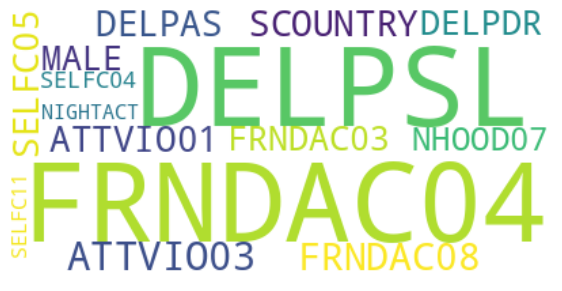

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

text = " ".join(i for i in df_word['Feat_Names'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Top 15 features based on feature_importances_
labels[0:14]

['FRNDAC04',
 'DELPSL',
 'ATTVIO03',
 'FRNDAC08',
 'ATTVIO01',
 'SCOUNTRY',
 'SELFC05',
 'DELPAS',
 'FRNDAC03',
 'MALE',
 'DELPDR',
 'NHOOD07',
 'SELFC04',
 'NIGHTACT']

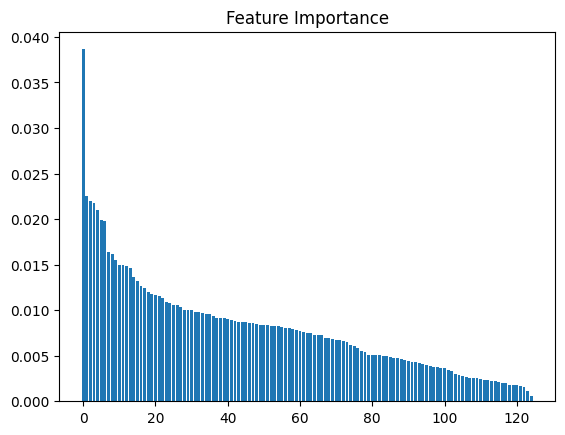

In [ ]:
# Get the number of features in the original DataFrame
num_features = df.shape[1]

# Make sure feat_labels contains the correct number of feature labels
feat_labels = df.columns[:num_features]

# Check that importances has the same length as the number of features
if len(importances) != num_features:
    # If not, only include the first num_features importances
    importances = importances[:num_features]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_labels[i] for i in indices]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(len(names)), importances[indices])
#plt.xticks(range(len(names)), names, rotation=90)
plt.show()


In [ ]:
# Features with importance of 0.075 or greater based on print out of feature_importances and plot
rf_imps =  labels[:62]

In [ ]:
np.array(rf_imps)

array(['FRNDAC04', 'DELPSL', 'ATTVIO03', 'FRNDAC08', 'ATTVIO01',
       'SCOUNTRY', 'SELFC05', 'DELPAS', 'FRNDAC03', 'MALE', 'DELPDR',
       'NHOOD07', 'SELFC04', 'NIGHTACT', 'SELFC11', 'ATTVIO04', 'SELFC06',
       'AFTSCH', 'ACTIV06', 'ATTVIO02', 'TRUANCY', 'KNOWFR', 'ACTIV05',
       'ATSCH06', 'ACTIV01', 'ATTVIO05', 'LEISFAM', 'SELFC02', 'SELFC10',
       'ACTIV03', 'GRPEXIST', 'ACCIDP', 'ATSCH07', 'SELFC12', 'FRNDAC06',
       'SELFC01', 'ATSCH03', 'OBEYTIME', 'ATSCH05', 'DINNFAM', 'FRNDAC07',
       'ACTIV02', 'NHOOD09', 'NHOOD12', 'SELFC03', 'FRNDAC09', 'ATTSCH',
       'NHOOD05', 'NHOOD02', 'NHOOD11', 'ATSCH02', 'SELFC08', 'NHOOD04',
       'NHOOD10', 'DELPBU', 'ACTIV04', 'NHOOD13', 'SELFC07', 'FRNDAC01',
       'SELFC09', 'GRPGEND', 'ATSCH04'], dtype='<U8')

In [ ]:
# Apply RF-Importance feature selection to X_train X_test
X_train_rf_imp = X_train.loc[:, rf_imps]
X_test_rf_imp = X_test.loc[:, rf_imps]

In [ ]:
X_train_rf_imp.shape

(30052, 62)

In [ ]:
X_train_rf_imp.columns

Index(['FRNDAC04', 'DELPSL', 'ATTVIO03', 'FRNDAC08', 'ATTVIO01', 'SCOUNTRY',
       'SELFC05', 'DELPAS', 'FRNDAC03', 'MALE', 'DELPDR', 'NHOOD07', 'SELFC04',
       'NIGHTACT', 'SELFC11', 'ATTVIO04', 'SELFC06', 'AFTSCH', 'ACTIV06',
       'ATTVIO02', 'TRUANCY', 'KNOWFR', 'ACTIV05', 'ATSCH06', 'ACTIV01',
       'ATTVIO05', 'LEISFAM', 'SELFC02', 'SELFC10', 'ACTIV03', 'GRPEXIST',
       'ACCIDP', 'ATSCH07', 'SELFC12', 'FRNDAC06', 'SELFC01', 'ATSCH03',
       'OBEYTIME', 'ATSCH05', 'DINNFAM', 'FRNDAC07', 'ACTIV02', 'NHOOD09',
       'NHOOD12', 'SELFC03', 'FRNDAC09', 'ATTSCH', 'NHOOD05', 'NHOOD02',
       'NHOOD11', 'ATSCH02', 'SELFC08', 'NHOOD04', 'NHOOD10', 'DELPBU',
       'ACTIV04', 'NHOOD13', 'SELFC07', 'FRNDAC01', 'SELFC09', 'GRPGEND',
       'ATSCH04'],
      dtype='object')

# Models

--------------------------------------------

## Logistic Regression

### Log Reg Baseline

In [ ]:
log_clf = LogisticRegression(max_iter=2000, random_state=42)

In [ ]:
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [ ]:
y_pred = log_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.93      0.88      9659
        True       0.66      0.41      0.51      3221

    accuracy                           0.80     12880
   macro avg       0.74      0.67      0.69     12880
weighted avg       0.79      0.80      0.78     12880



In [ ]:
print(f1_score(y_test, y_pred))

0.508331737215093


### Log Reg P-Value

In [ ]:
log_clf_pval = LogisticRegression(max_iter=2000, random_state=42)
log_clf_pval.fit(X_train_pval, y_train)
y_pred_pval = log_clf_pval.predict(X_test_pval)

In [ ]:
print(classification_report(y_test, y_pred_pval))

              precision    recall  f1-score   support

       False       0.82      0.93      0.87      9659
        True       0.66      0.40      0.50      3221

    accuracy                           0.80     12880
   macro avg       0.74      0.67      0.69     12880
weighted avg       0.78      0.80      0.78     12880



In [ ]:
print(f1_score(y_test, y_pred_pval))

0.4997114829774957


### Log Reg Feat_Importance

In [ ]:
log_clf_rf_imp = LogisticRegression(max_iter=2000, random_state=42)
log_clf_rf_imp.fit(X_train_rf_imp, y_train)
y_pred_pval2 = log_clf_rf_imp.predict(X_test_rf_imp)

In [ ]:
print(classification_report(y_test, y_pred_pval2))

              precision    recall  f1-score   support

       False       0.82      0.94      0.87      9659
        True       0.66      0.38      0.48      3221

    accuracy                           0.80     12880
   macro avg       0.74      0.66      0.68     12880
weighted avg       0.78      0.80      0.77     12880



In [ ]:
print(f1_score(y_test, y_pred_pval2))

0.4787170857255989


### Log Reg Hyper-parameter Tune

In [ ]:
# define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],
    'max_iter': [2000]
}

In [ ]:
# define the grid search cross-validation object
grid_search = GridSearchCV(log_clf_pval, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_pval, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [2000], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg']},
             scoring='f1')

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Best parameters:  {'C': 10, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best F1 score:  0.49499260136491535


In [ ]:
# Best parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
log_final = LogisticRegression(C=10, penalty='l2', solver='newton-cg', max_iter=2000)
log_final.fit(X_train_pval, y_train)
y_pred_log_final = log_final.predict(X_test_pval)

In [ ]:
print(classification_report(y_test, y_pred_log_final))

              precision    recall  f1-score   support

       False       0.82      0.93      0.87      9659
        True       0.66      0.40      0.50      3221

    accuracy                           0.80     12880
   macro avg       0.74      0.67      0.69     12880
weighted avg       0.78      0.80      0.78     12880



In [ ]:
print(f1_score(y_test, y_pred_log_final))

0.5000961723408348


### Log Reg Confusion Matrix

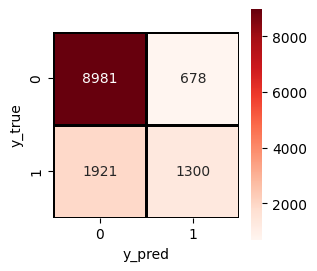

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log_final)

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_log,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Log Reg Threshold tuning

In [ ]:
# predict probabilities for test set
y_pred_proba = log_final.predict_proba(X_test_pval)[:, 1]

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

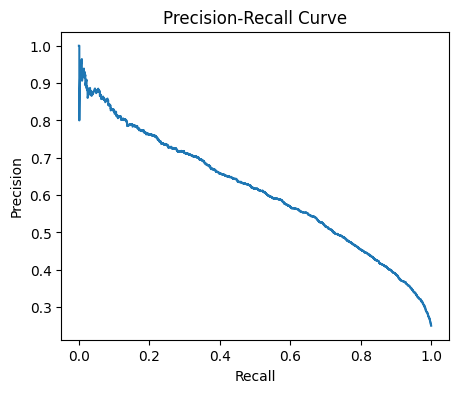

In [ ]:
# plot the precision-recall curve
plt.figure(figsize=(5, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# calculate F1-score for each threshold
f1_scores = [f1_score(y_test, y_pred_proba >= th) for th in thresholds]

# find the threshold that maximizes the F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

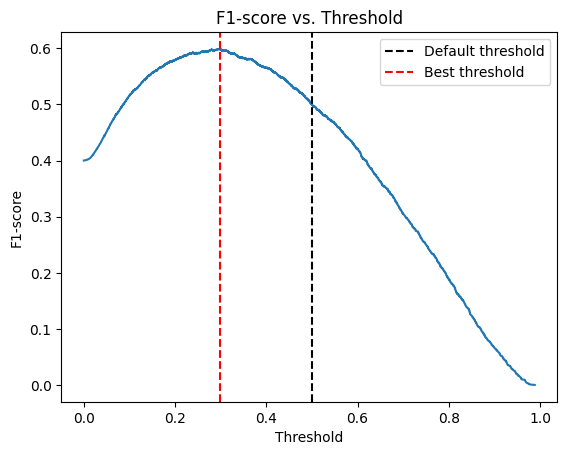

In [ ]:
# plot the F1-scores against the thresholds
plt.plot(thresholds, f1_scores)
plt.axvline(x=0.5, color='k', linestyle='--', label='Default threshold')
plt.axvline(x=best_threshold, color='r', linestyle='--', label='Best threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.legend()
plt.show()

In [ ]:
best_threshold

0.29771286877015407

In [ ]:
# set a threshold value (0.5 by default)
#threshold = 0.2916142395850417
threshold = 0.29771286877015407

# adjust threshold and make predictions
y_pred_thresh_log = np.where(y_pred_proba > threshold, 1, 0)

### Log Reg Metrics on Best Model

In [ ]:
# Confusion Matrix, ROC-AUC?
print(classification_report(y_test, y_pred_thresh_log))

              precision    recall  f1-score   support

       False       0.88      0.81      0.84      9659
        True       0.54      0.67      0.60      3221

    accuracy                           0.78     12880
   macro avg       0.71      0.74      0.72     12880
weighted avg       0.80      0.78      0.78     12880



In [ ]:
print(f1_score(y_test, y_pred_thresh_log))

0.5985563575791226


In [ ]:
print(accuracy_score(y_test, y_pred_thresh_log))

0.7754658385093167


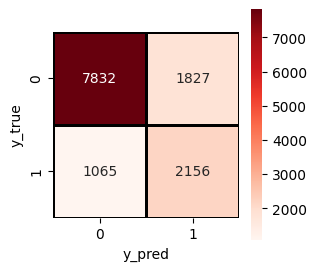

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_thresh_log)

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_log,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

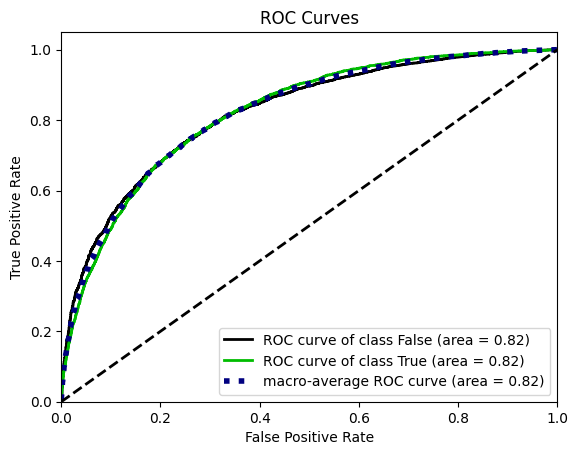

In [ ]:
skplt.metrics.plot_roc(y_test, log_final.predict_proba(X_test_pval), plot_micro=False)
plt.show()

## Decision Tree

### Decision Tree Baseline

In [ ]:
# Tune parameters later
dtc_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred2 = dtc_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.82      0.81      0.82      9659
        True       0.45      0.46      0.46      3221

    accuracy                           0.72     12880
   macro avg       0.63      0.64      0.64     12880
weighted avg       0.73      0.72      0.73     12880



In [ ]:
print(f1_score(y_test, y_pred2))

0.4559410500460547


### DT P-Value

In [ ]:
dtc_clf_pval = DecisionTreeClassifier(random_state=42)
dtc_clf_pval.fit(X_train_pval, y_train)
y_pred_pval2 = dtc_clf_pval.predict(X_test_pval)

In [ ]:
print(classification_report(y_test, y_pred_pval2))

              precision    recall  f1-score   support

       False       0.82      0.82      0.82      9659
        True       0.46      0.47      0.46      3221

    accuracy                           0.73     12880
   macro avg       0.64      0.64      0.64     12880
weighted avg       0.73      0.73      0.73     12880



In [ ]:
print(f1_score(y_test, y_pred_pval2))

0.4644666155026861


### DT Hyper-parameter Tune

In [ ]:
# define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8],
              'criterion': ['gini', 'entropy']}

In [ ]:
# perform grid search cross-validation
grid_search = GridSearchCV(dtc_clf_pval, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_pval, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='f1')

In [ ]:
# print the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [ ]:
# Best Params
# {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [ ]:
# train the final model on the entire training set using the best hyperparameters
dtc_final = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6, min_samples_split=2, random_state=42)
dtc_final.fit(X_train_pval, y_train)
y_pred_dtc_final = dtc_final.predict(X_test_pval)

In [ ]:
print(classification_report(y_test, y_pred_dtc_final))

              precision    recall  f1-score   support

       False       0.83      0.91      0.86      9659
        True       0.60      0.43      0.50      3221

    accuracy                           0.79     12880
   macro avg       0.72      0.67      0.68     12880
weighted avg       0.77      0.79      0.77     12880



In [ ]:
print(f1_score(y_test, y_pred_dtc_final))

0.5022681908909453


### DT Confusion Matrix

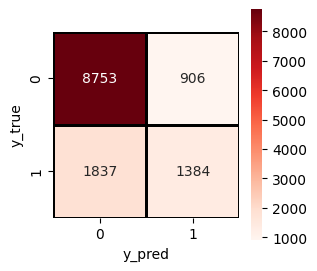

In [ ]:
cm = confusion_matrix(y_test, y_pred_dtc_final)

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### DT Threshold Tuning

In [ ]:
y_pred_proba = dtc_final.predict_proba(X_test_pval)[:, 1]

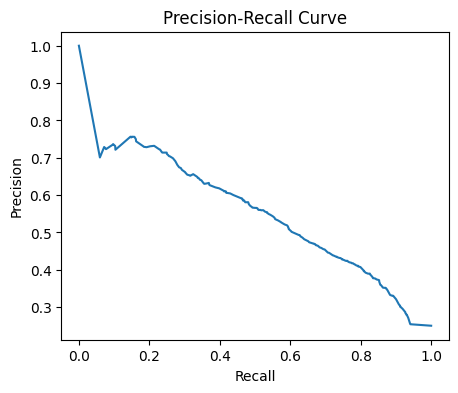

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# plot the precision-recall curve
plt.figure(figsize=(5, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# calculate F1-score for each threshold
f1_scores = [f1_score(y_test, y_pred_proba >= th) for th in thresholds]

# find the threshold that maximizes the F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

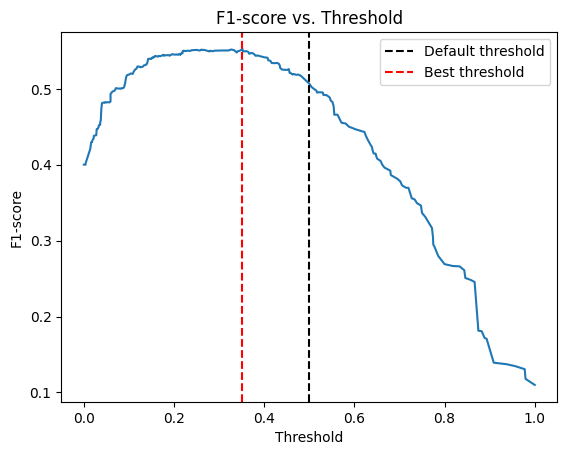

In [ ]:
# plot the F1-scores against the thresholds
plt.plot(thresholds, f1_scores)
plt.axvline(x=0.5, color='k', linestyle='--', label='Default threshold')
plt.axvline(x=best_threshold, color='r', linestyle='--', label='Best threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.legend()
plt.show()

In [ ]:
best_threshold

0.35172413793103446

In [ ]:
# set a threshold value (0.5 by default)
threshold = 0.35172413793103446

# adjust threshold and make predictions
y_pred_thresh_dtc = np.where(y_pred_proba > threshold, 1, 0)

### DT Metrics on Best Model

In [ ]:
print(classification_report(y_test, y_pred_thresh_dtc))

              precision    recall  f1-score   support

       False       0.86      0.82      0.84      9659
        True       0.52      0.58      0.55      3221

    accuracy                           0.76     12880
   macro avg       0.69      0.70      0.69     12880
weighted avg       0.77      0.76      0.77     12880



In [ ]:
print(f1_score(y_test, y_pred_thresh_dtc))

0.550885927661444


In [ ]:
print(accuracy_score(y_test, y_pred_thresh_dtc))

0.7618788819875777


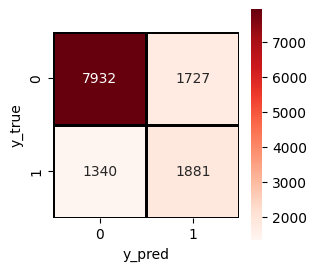

In [ ]:
cm_dtc = confusion_matrix(y_test, y_pred_thresh_dtc)

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_dtc,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

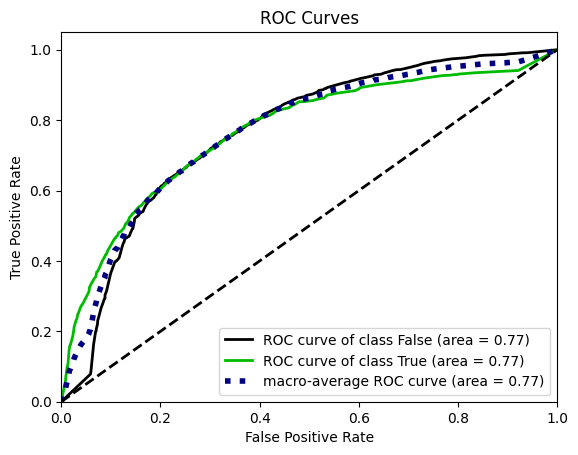

In [ ]:
skplt.metrics.plot_roc(y_test, dtc_final.predict_proba(X_test_pval), plot_micro=False)
plt.show()

## Random Forest

### Random Forest Baseline

In [ ]:
rnd_clf = RandomForestClassifier(random_state=42)

In [ ]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred3 = rnd_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

       False       0.83      0.95      0.89      9659
        True       0.74      0.40      0.52      3221

    accuracy                           0.82     12880
   macro avg       0.78      0.68      0.70     12880
weighted avg       0.81      0.82      0.79     12880



In [ ]:
print(f1_score(y_test, y_pred3))

0.5211097708082026


### RF P-Value

In [ ]:
rnd_clf_pval = RandomForestClassifier(random_state=42)
rnd_clf_pval.fit(X_train_pval, y_train)
y_pred_pval3 = rnd_clf_pval.predict(X_test_pval)

In [ ]:
print(classification_report(y_test, y_pred_pval3))

              precision    recall  f1-score   support

       False       0.83      0.95      0.88      9659
        True       0.73      0.41      0.53      3221

    accuracy                           0.81     12880
   macro avg       0.78      0.68      0.71     12880
weighted avg       0.80      0.81      0.80     12880



In [ ]:
print(f1_score(y_test, y_pred_pval3))

0.5273769519667918


In [ ]:
# Not Applicable

### RF Hyper-parameter Tune

In [ ]:
# Define hyperparameters to tune
hyperparameters = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# perform grid search cross-validation
grid_search = GridSearchCV(rnd_clf_pval, hyperparameters, cv=5, scoring='f1')
grid_search.fit(X_train_pval, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='f1')

In [ ]:
 # print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# best params
# {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

In [ ]:
# train the final model on the entire training set using the best hyperparameters
#min_samples_leaf = 2 / 0.529388
#min_sample_split = 10 / good
#n_estimators = 49 / 0.530234
#n_estimators = 48 / 0.5313914

rnd_final = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=48, random_state=42)
rnd_final.fit(X_train_pval, y_train)
y_pred_rnd_final = rnd_final.predict(X_test_pval)

In [ ]:
print(classification_report(y_test, y_pred_rnd_final))

              precision    recall  f1-score   support

       False       0.83      0.95      0.88      9659
        True       0.73      0.42      0.53      3221

    accuracy                           0.82     12880
   macro avg       0.78      0.68      0.71     12880
weighted avg       0.80      0.82      0.80     12880



In [ ]:
print(f1_score(y_test, y_pred_rnd_final))

0.5313914583743358


### RF Confusion Matrix

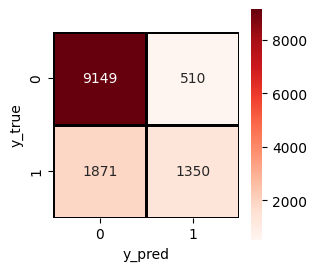

In [ ]:
cm = confusion_matrix(y_test, y_pred_rnd_final)

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### RF Threshold Tuning

In [ ]:
y_pred_proba = rnd_final.predict_proba(X_test_pval)[:, 1]

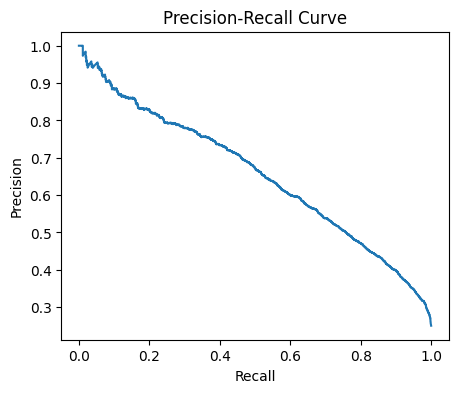

In [ ]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# plot the precision-recall curve
plt.figure(figsize=(5, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# calculate F1-score for each threshold
f1_scores = [f1_score(y_test, y_pred_proba >= th) for th in thresholds]

# find the threshold that maximizes the F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

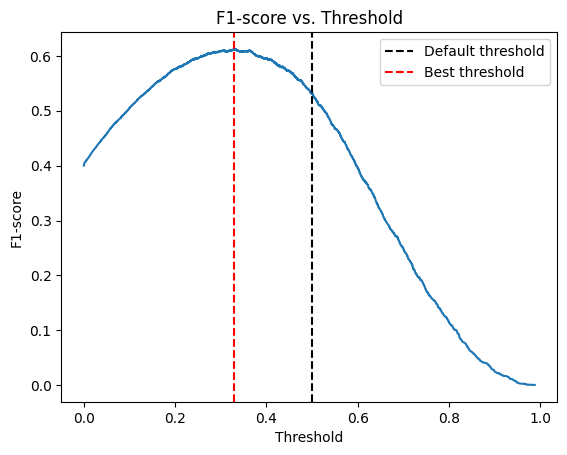

In [ ]:
# plot the F1-scores against the thresholds
plt.plot(thresholds, f1_scores)
plt.axvline(x=0.5, color='k', linestyle='--', label='Default threshold')
plt.axvline(x=best_threshold, color='r', linestyle='--', label='Best threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.legend()
plt.show()

In [ ]:
best_threshold

0.32894616957116957

In [ ]:
# set a threshold value (0.5 by default)
threshold = 0.32894616957116957

# adjust threshold and make predictions
y_pred_thresh_rnd = np.where(y_pred_proba > threshold, 1, 0)

### RF Metrics on Best Model

In [ ]:
print(classification_report(y_test, y_pred_thresh_rnd))

              precision    recall  f1-score   support

       False       0.88      0.82      0.85      9659
        True       0.56      0.68      0.61      3221

    accuracy                           0.79     12880
   macro avg       0.72      0.75      0.73     12880
weighted avg       0.80      0.79      0.79     12880



In [ ]:
print(f1_score(y_test, y_pred_thresh_rnd))

0.6123310810810811


In [ ]:
print(accuracy_score(y_test, y_pred_thresh_rnd))

0.7861801242236025


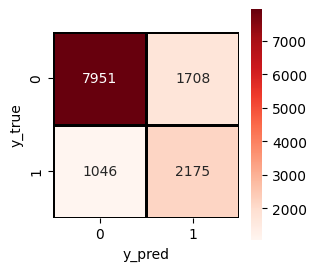

In [ ]:
cm_rnd = confusion_matrix(y_test, y_pred_thresh_rnd)

f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_rnd,annot = True,cmap='Reds',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

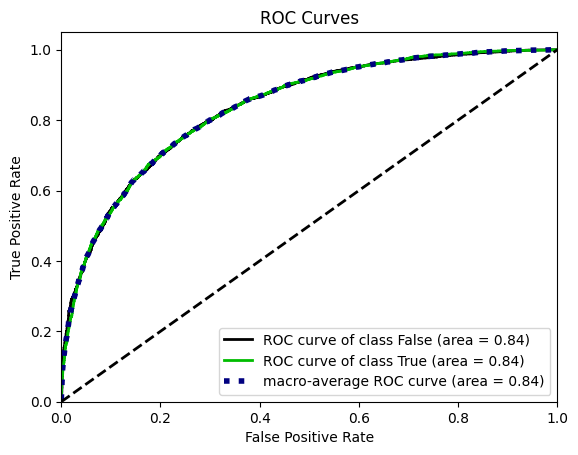

In [ ]:
skplt.metrics.plot_roc(y_test, rnd_final.predict_proba(X_test_pval), plot_micro=False)
plt.show()

# F1 Score Comparing Models

Logistic Regression

In [ ]:
print(f1_score(y_test, y_pred_thresh_log))

0.5985563575791226


Decision Tree

In [ ]:
print(f1_score(y_test, y_pred_thresh_dtc))

0.550885927661444


Random Forest

In [ ]:
print(f1_score(y_test, y_pred_thresh_rnd))

0.6123310810810811
